# **Import Libraries**

In [100]:
# Pandas for data manipulation
import pandas as pd

# Matplotlib for plotting
import matplotlib.pyplot as plt

# Seaborn for enhanced visualization
import seaborn as sns

In [101]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For label encoding categorical variables
from sklearn.preprocessing import LabelEncoder

In [102]:
# Libraries for data balancing
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique for addressing class imbalance

In [103]:
# Libraries for model evaluation and tuning
from sklearn.model_selection import GridSearchCV  # Grid search for hyperparameter tuning
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Metrics for model evaluation

# **Upload Dataset**

In [104]:
# Reading the dataset from a CSV file and storing it in a DataFrame called df
df = pd.read_csv('/content/Data.csv')

In [105]:
# Dropping rows with missing values from the DataFrame in place
df.dropna(inplace=True)

In [106]:
# Displaying the column names of the DataFrame
df.columns

Index(['Player Name', 'Position', 'Club Name', 'Age', ' Weekly Salary ',
       'Matches Played', 'Minutes Played', 'Yellow Cards', 'Red Cards ',
       'Shots', 'Shots per 90', 'Tackles Made', 'Tackles Won',
       'Times Team Pressed Opposition', 'Blocks ', 'Interceptions',
       'Clearances', 'Fouls Commited', 'Fouls Drawn', 'Loose Balls Recovered',
       'Aerial Battles Won %', 'Goal Creation per 90',
       'Fully Completed Matches', 'Touches', 'Successful Dribbles',
       'Attempted Dribbles', 'Distance Ran', 'Distance Covered With Ball',
       'Times Dispossessed', 'Passes Received', 'Total Injuries',
       'Minor Injuries', 'Moderate Injuries', 'Serious Injuries', 'COVID-19'],
      dtype='object')

# **Convert All Factors to Per-90**

In [107]:
# Calculating the number of full 90-minute matches played by dividing the total minutes played by 90
df['Full 90s Played'] = df['Minutes Played'] / 90

In [108]:
# List of columns to be converted to numeric data type
columns_to_convert = ['Yellow Cards', 'Red Cards ', 'Tackles Made', 'Tackles Won', 'Times Team Pressed Opposition',
                      'Blocks ', 'Interceptions', 'Clearances', 'Fouls Commited', 'Fouls Drawn', 'Loose Balls Recovered',
                      'Touches', 'Successful Dribbles', 'Attempted Dribbles', 'Distance Ran', 'Distance Covered With Ball',
                      'Times Dispossessed', 'Passes Received', 'Total Injuries', 'Minor Injuries', 'Moderate Injuries',
                      'Serious Injuries', 'COVID-19']



In [109]:
# List of columns to select for further analysis
columns_to_select = ['Yellow Cards', 'Red Cards ', 'Tackles Made', 'Tackles Won', 'Times Team Pressed Opposition',
                      'Blocks ', 'Interceptions', 'Clearances', 'Fouls Commited', 'Fouls Drawn', 'Loose Balls Recovered',
                      'Touches', 'Successful Dribbles', 'Attempted Dribbles', 'Distance Ran', 'Distance Covered With Ball',
                      'Times Dispossessed', 'Passes Received']

In [110]:
# Iterating through each column in the list of columns to convert
for column in columns_to_convert:
    # Calculating the per 90 minutes value for the current column and creating a new column with the suffix ' per 90'
    df[column + ' per 90'] = df[column] / df['Full 90s Played']

# **Distributions**

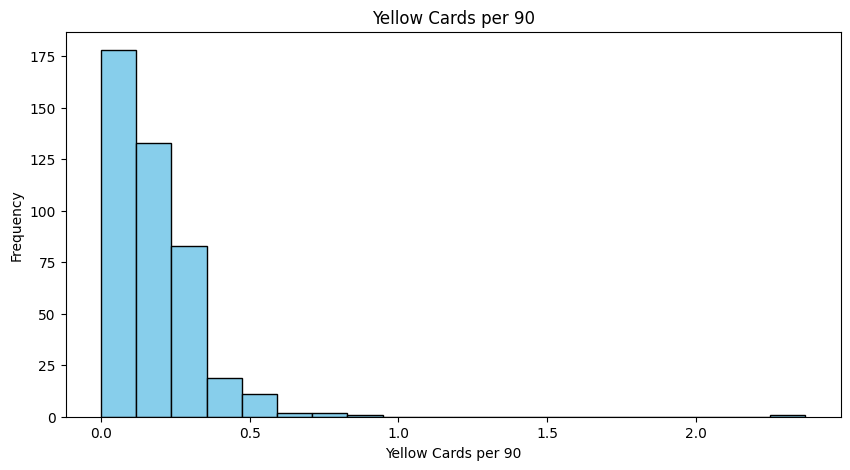

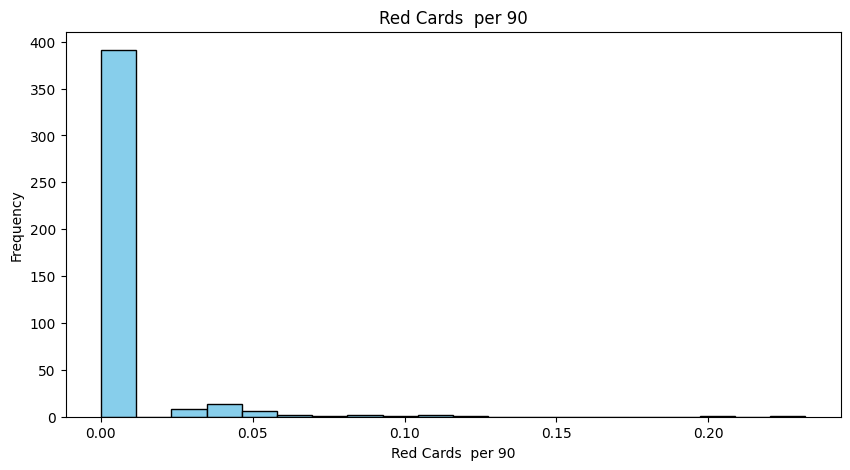

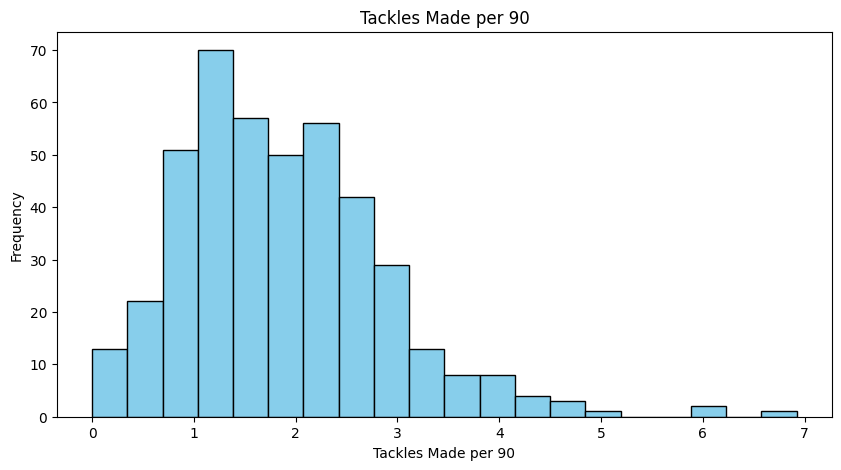

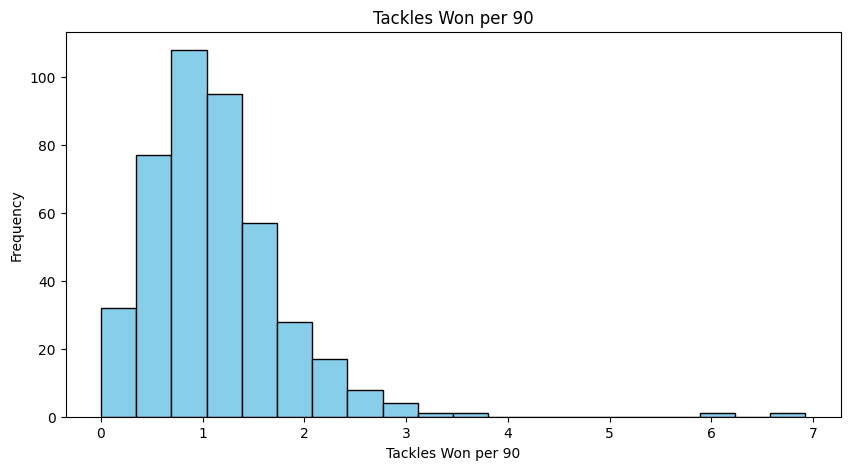

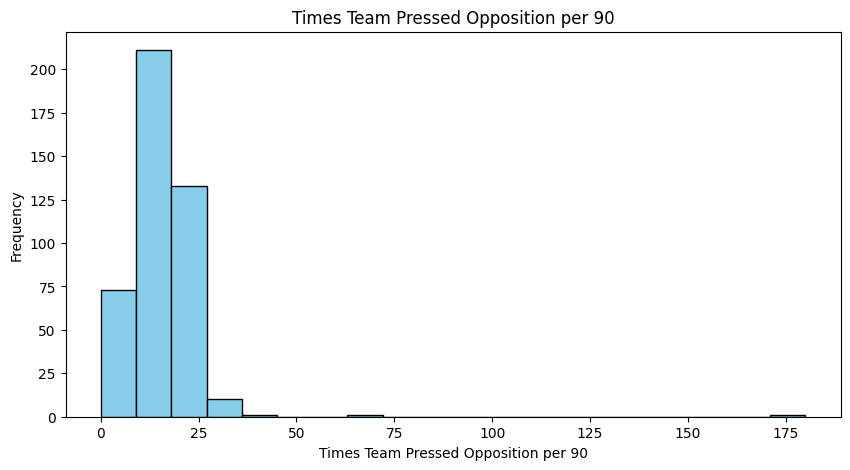

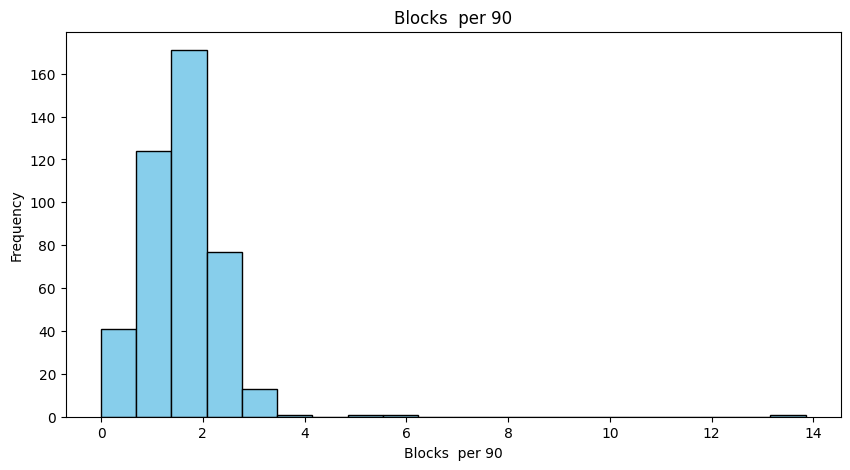

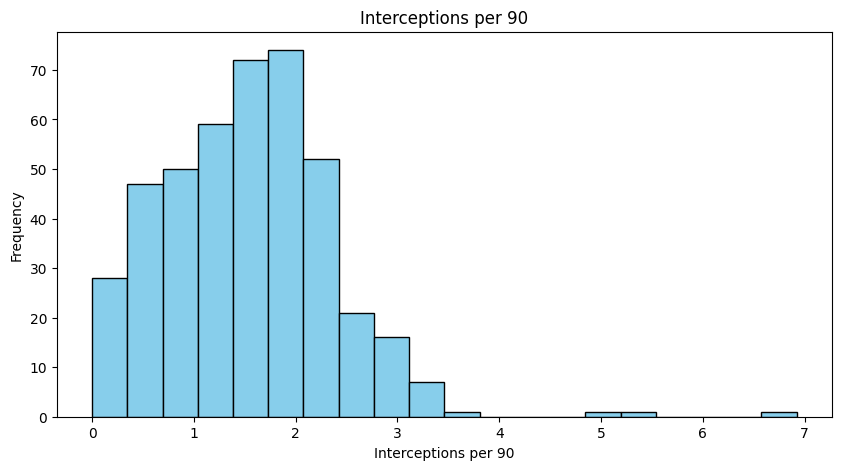

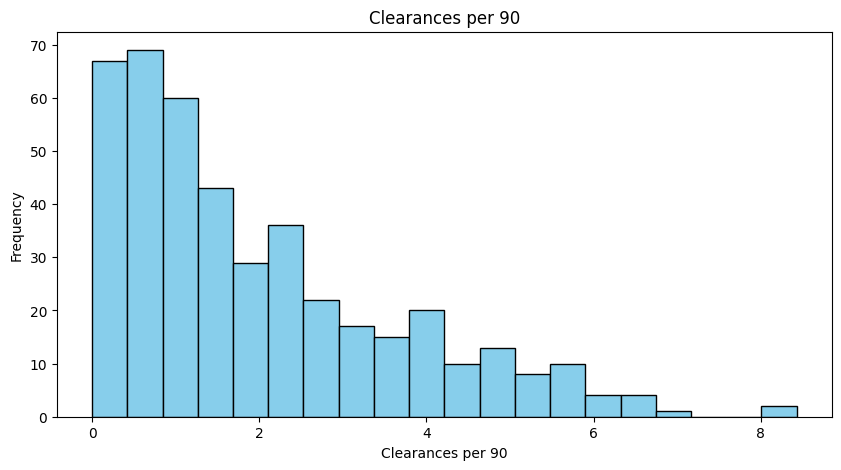

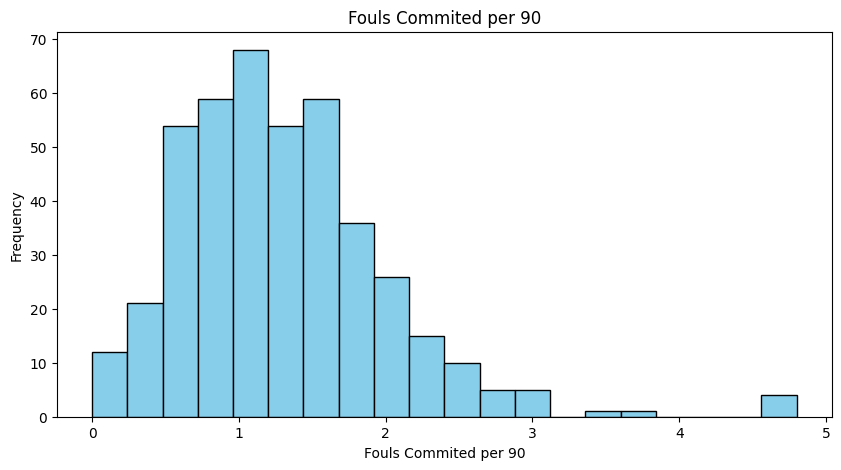

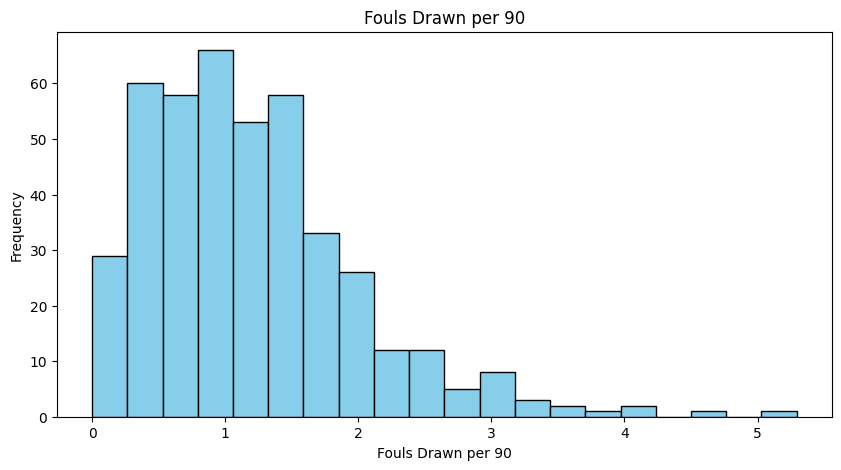

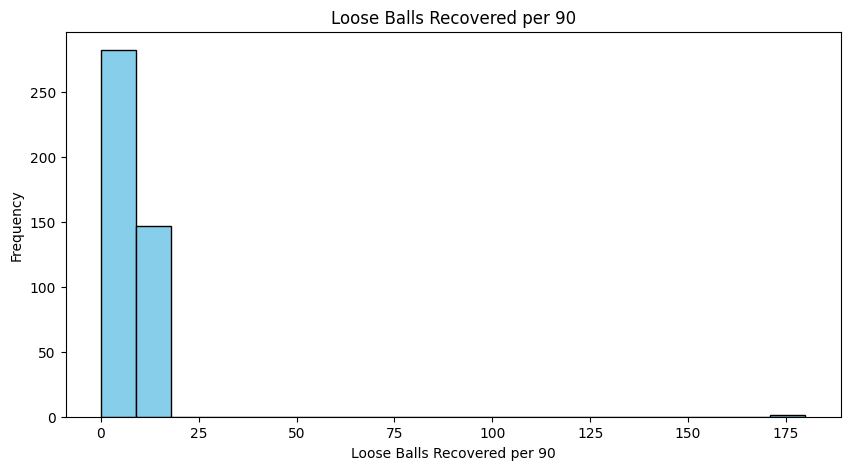

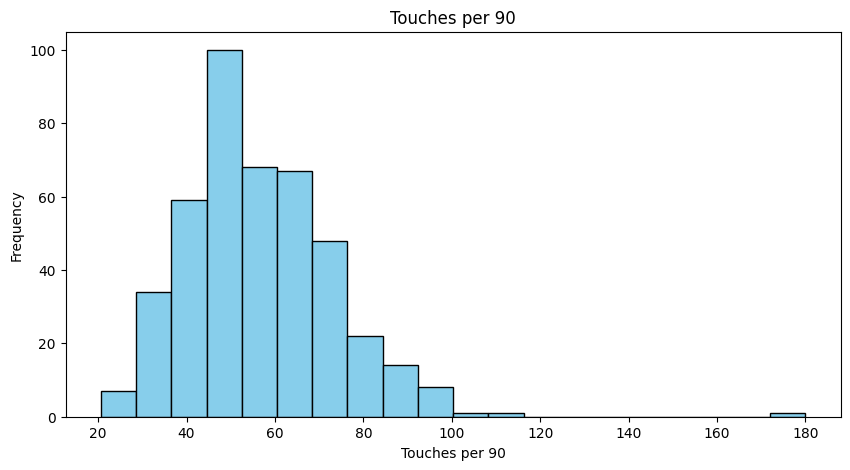

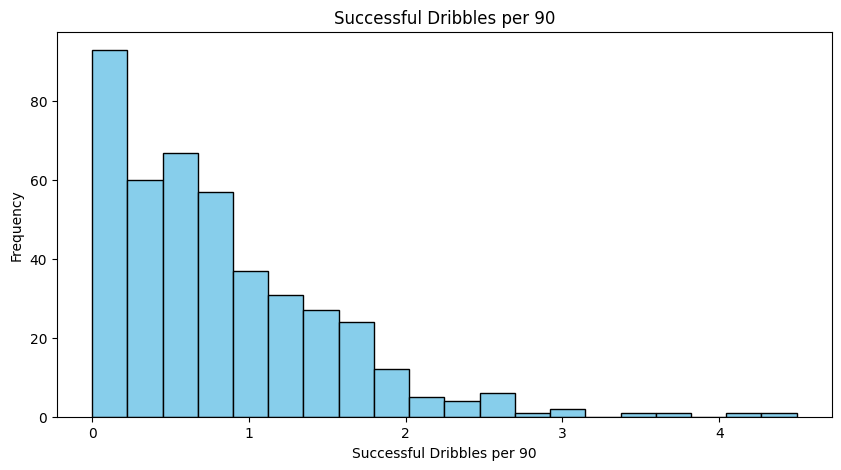

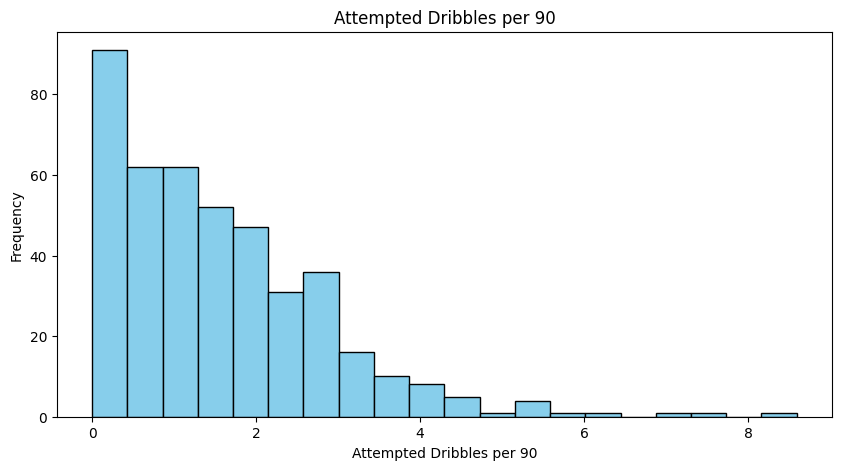

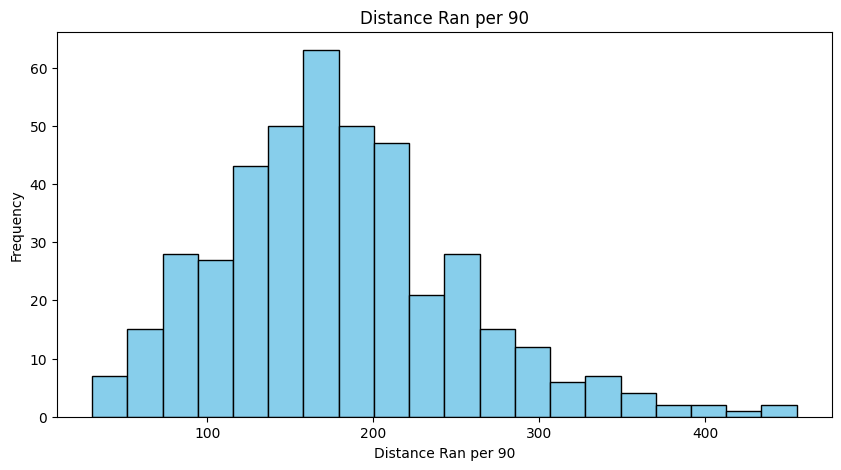

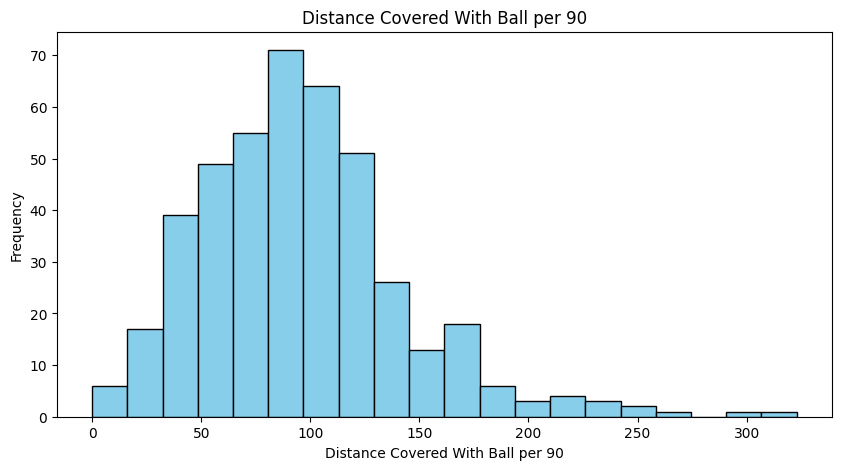

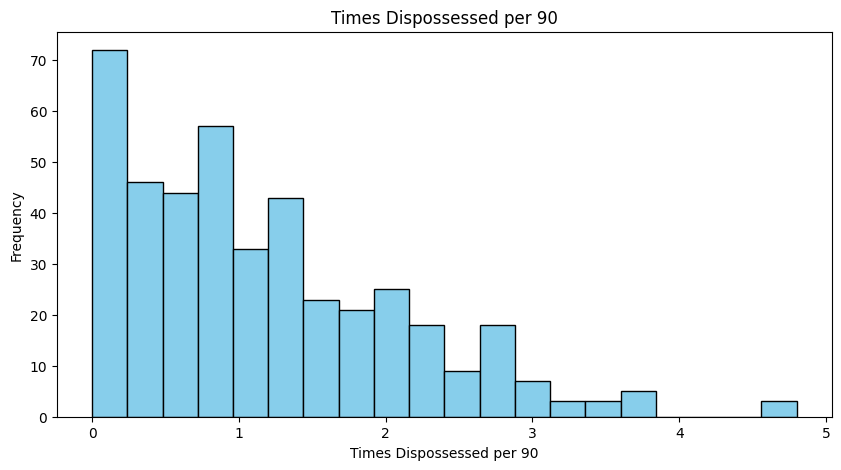

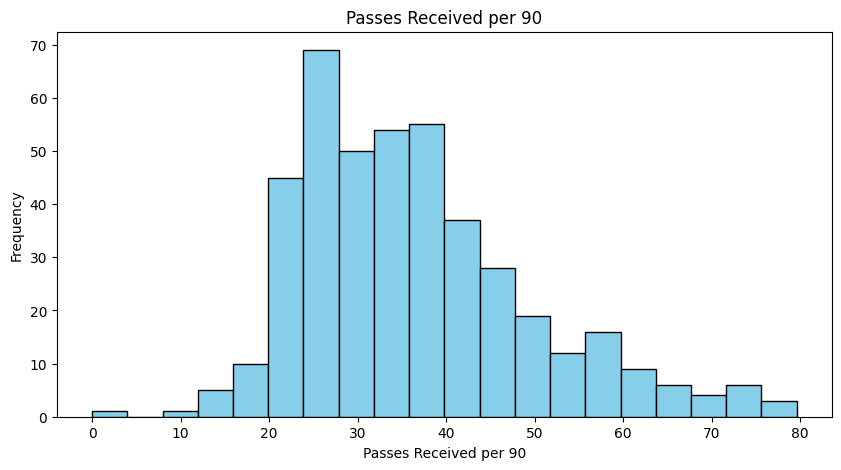

In [111]:
# Iterating through each column in the list of columns to select
for column in columns_to_select:
   # Calculating the per 90 minutes value for the current column and creating a new column with the suffix ' per 90'
    df[column + ' per 90'] = df[column] / df['Full 90s Played']

# Iterating through each column in the list of columns to select
for column in columns_to_select:
   # Creating a histogram for the per 90 minutes values of the current column
    plt.figure(figsize=(10, 5))
    plt.hist(df[column + ' per 90'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{column} per 90')   # Setting the title of the histogram
    plt.xlabel(f'{column} per 90')  # Setting the label for the x-axis
    plt.ylabel('Frequency')         # Setting the label for the y-axis
    plt.show()                      # Displaying the histogram


# **Frquency of Injured Players by Other Factors**

In [112]:
# Filtering the DataFrame to select rows where players have experienced at least one type of injury
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

**Club Name**

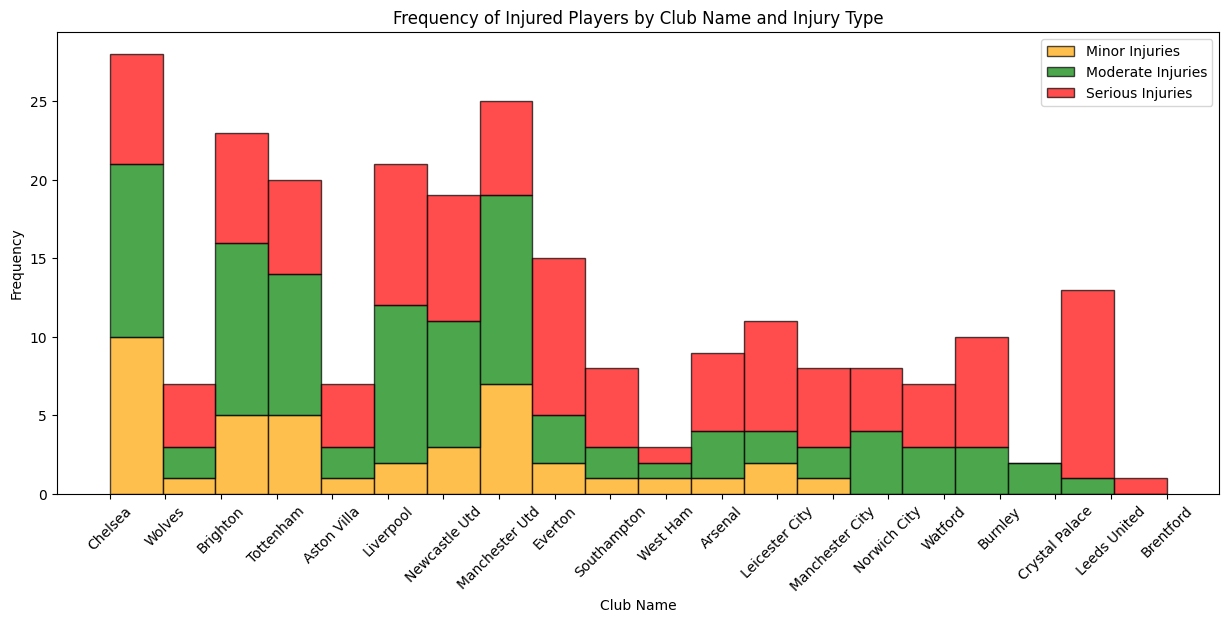

In [113]:
# Counting the occurrences of each club in the filtered DataFrame
club_counts = injured_players_df['Club Name'].value_counts()

# Creating a histogram to visualize the frequency of injured players by club name and injury type
plt.figure(figsize=(15, 6))
plt.hist([
      # Select 'club name' data for players who have experienced minor injuries per 90 minutes greater than 0
      injured_players_df['Club Name'][injured_players_df['Minor Injuries'] > 0],
      # Select 'club name' data for players who have experienced moderate injuries per 90 minutes greater than 0
      injured_players_df['Club Name'][injured_players_df['Moderate Injuries'] > 0],
      # Select 'club name' data for players who have experienced serious injuries per 90 minutes greater than 0
      injured_players_df['Club Name'][injured_players_df['Serious Injuries'] > 0]],

         bins=len(club_counts),            # Define bins for the histogram
         color=['orange', 'green', 'red'], # Set colors for each injury type
         alpha=0.7,                        # Set transparency level
         stacked=True,edgecolor='black',   # Stack histograms and set edge color
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])     # Add labels for legend

plt.title('Frequency of Injured Players by Club Name and Injury Type') # Setting the title of the histogram
plt.xlabel('Club Name')  # Setting the label for the x-axis
plt.ylabel('Frequency')  # Setting the label for the y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.legend()             # Displaying legend to distinguish between injury types
plt.grid(False)          # Turning off grid lines
plt.show()               # Displaying the histogram


**Position**

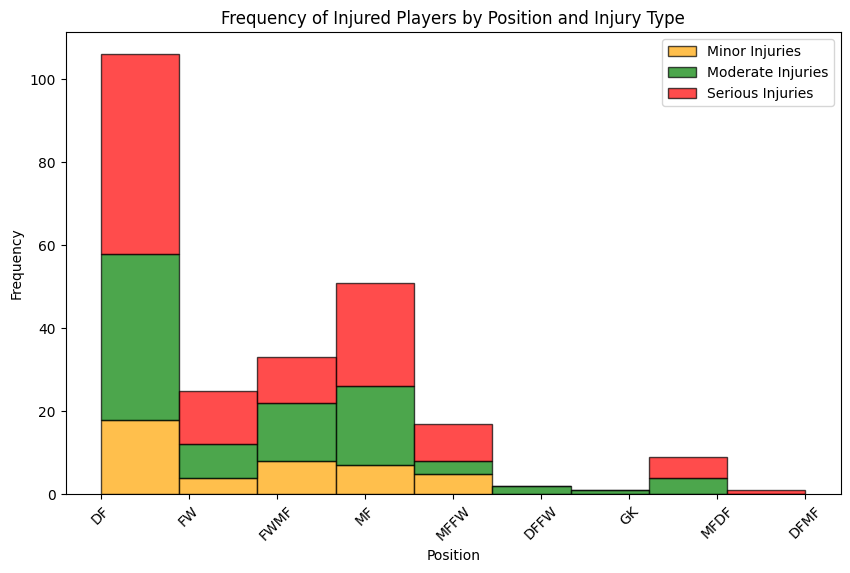

In [114]:
# Counting the occurrences of each position in the filtered DataFrame
position_counts = injured_players_df['Position'].value_counts()

# Creating a histogram to visualize the frequency of injured players by Position and injury type
plt.figure(figsize=(10, 6))
plt.hist([
      # Select 'Position' data for players who have experienced minor injuries per 90 minutes greater than 0
      injured_players_df['Position'][injured_players_df['Minor Injuries'] > 0],
      # Select 'Position' data for players who have experienced moderate injuries per 90 minutes greater than 0
      injured_players_df['Position'][injured_players_df['Moderate Injuries'] > 0],
      # Select 'Position' data for players who have experienced serious injuries per 90 minutes greater than 0
      injured_players_df['Position'][injured_players_df['Serious Injuries'] > 0]],

         bins=len(position_counts),        # Define bins for the histogram
         color=['orange', 'green', 'red'], # Set colors for each injury type
         alpha=0.7,                        # Set transparency level
         stacked=True,edgecolor='black',   # Stack histograms and set edge color
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])     # Add labels for legend

plt.title('Frequency of Injured Players by Position and Injury Type')  # Setting the title of the histogram
plt.xlabel('Position')       # Setting the label for the x-axis
plt.ylabel('Frequency')      # Setting the label for the y-axis
plt.xticks(rotation=45)      # Rotating x-axis labels for better readability
plt.legend()                 # Display legend
plt.grid(False)              # Turning off grid lines
plt.show()                   # Displaying the histogram


**Age**

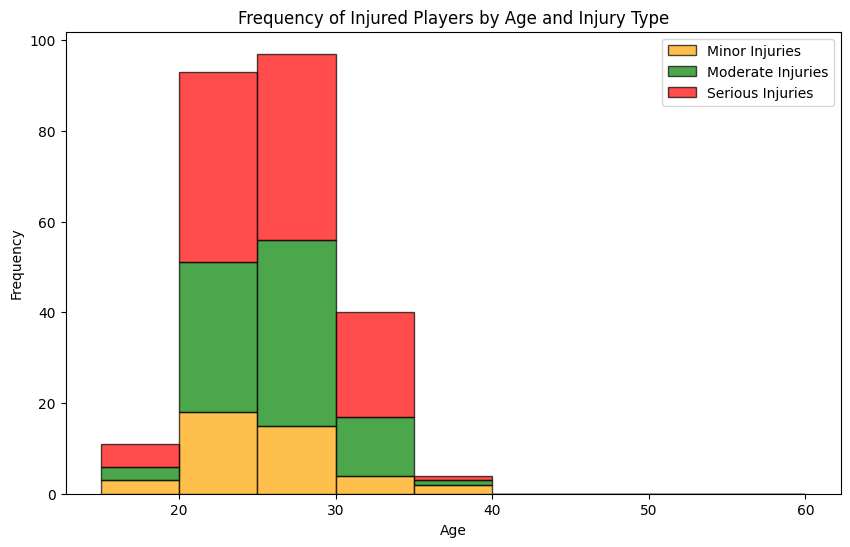

In [115]:
# Defining age bins for categorizing player ages
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

# Creating a histogram to visualize the frequency of injured players by age and injury type
plt.figure(figsize=(10, 6))
plt.hist([
       # Select 'age' data for players who have experienced minor injuries per 90 minutes greater than 0
       injured_players_df['Age'][injured_players_df['Minor Injuries'] > 0],
       # Select 'age' data for players who have experienced minor injuries per 90 minutes greater than 0
       injured_players_df['Age'][injured_players_df['Moderate Injuries'] > 0],
       # Select 'age' data for players who have experienced minor injuries per 90 minutes greater than 0
       injured_players_df['Age'][injured_players_df['Serious Injuries'] > 0]],

         bins=age_bins,                    # Define bins for the histogram
         color=['orange', 'green', 'red'], # Set colors for each injury type
         alpha=0.7, stacked=True,          # Set transparency level
         edgecolor='black',                # Stack histograms and set edge color
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])     # Add labels for legend

plt.title('Frequency of Injured Players by Age and Injury Type')  # Setting the title of the histogram
plt.xlabel('Age')           # Setting the label for the x-axis
plt.ylabel('Frequency')     # Setting the label for the y-axis
plt.legend()                # Display legend
plt.grid(False)             # Turning off grid lines
plt.show()                  # Displaying the histogram

**Full 90s Played**

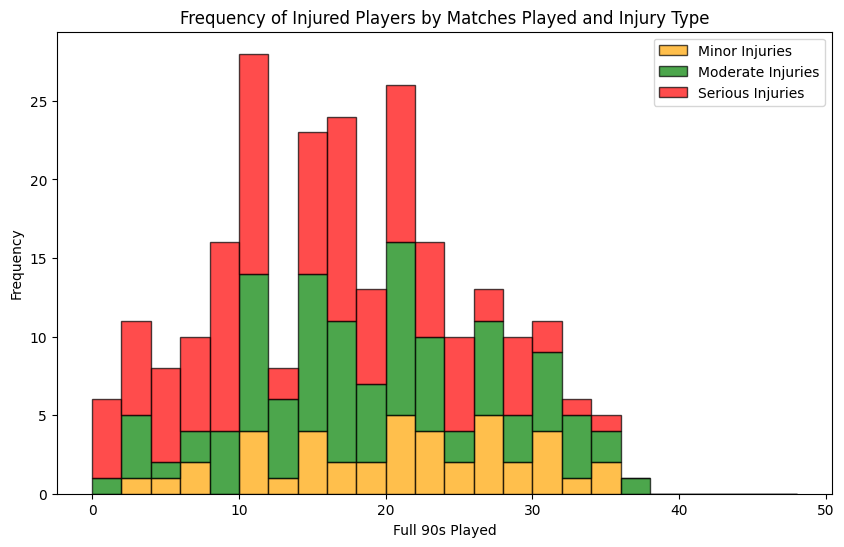

In [116]:
# Set the figure size for the histogram
plt.figure(figsize=(10, 6))

# Plot histogram for each type of injury based on full 90s played
plt.hist([
        # Select 'full 90s played' data for players who have experienced minor injuries per 90 minutes greater than 0
        injured_players_df['Full 90s Played'][injured_players_df['Minor Injuries'] > 0],
        # Select 'full 90s played' data for players who have experienced moderate injuries per 90 minutes greater than 0
        injured_players_df['Full 90s Played'][injured_players_df['Moderate Injuries'] > 0],
        # Select 'full 90s played' data for players who have experienced serious injuries per 90 minutes greater than 0
        injured_players_df['Full 90s Played'][injured_players_df['Serious Injuries'] > 0]],

    bins=range(0, 50, 2),                       # Define bins for the histogram
    color=['orange', 'green', 'red'],           # Set colors for each injury type
    alpha=0.7,                                  # Set transparency level
    stacked=True,edgecolor='black',             # Stack histograms and set edge color
    label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries']   # Add labels for legend
)

# Set title and labels for the histogram
plt.title('Frequency of Injured Players by Matches Played and Injury Type')  # Setting the title of the histogram
plt.xlabel('Full 90s Played')    # Setting the label for the x-axis
plt.ylabel('Frequency')          # Setting the label for the y-axis
plt.legend()         # Display legend
plt.grid(False)      # Turn off grid lines
plt.show()           # Display the plot


**Minutes Played**

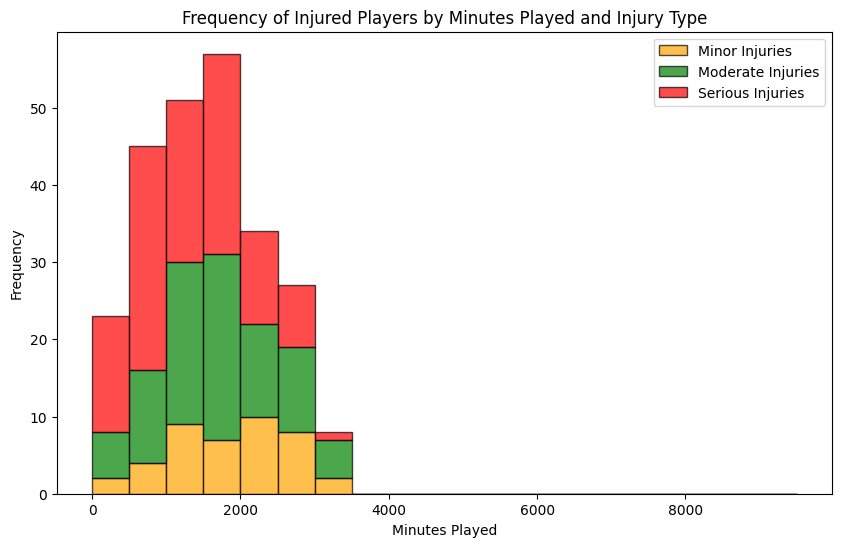

In [117]:
# Set the figure size for the histogram
plt.figure(figsize=(10, 6))

# Plot histogram for each type of injury based on minutes played
plt.hist(
      # Select 'minutes played' data for players who have experienced minor injuries per 90 minutes greater than 0
      [injured_players_df['Minutes Played'][injured_players_df['Minor Injuries'] > 0],
      # Select 'minutes played' data for players who have experienced moderate injuries per 90 minutes greater than 0
      injured_players_df['Minutes Played'][injured_players_df['Moderate Injuries'] > 0],
      # Select 'minutes played' data for players who have experienced serious injuries per 90 minutes greater than 0
      injured_players_df['Minutes Played'][injured_players_df['Serious Injuries'] > 0]],

         bins=range(0, 10000, 500),        # Define bins for the histogram
         color=['orange', 'green', 'red'], # Set colors for each injury type
         alpha=0.7,                        # Set transparency level
         stacked=True,edgecolor='black',   # Stack histograms and set edge color
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])  # Add labels for legend

# Set title and labels for the histogram
plt.title('Frequency of Injured Players by Minutes Played and Injury Type')  # Setting the title of the histogram
plt.xlabel('Minutes Played')         # Setting the label for the x-axis
plt.ylabel('Frequency')              # Setting the label for the y-axis
plt.legend()                         # Display legend
plt.grid(False)                      # Turn off grid lines
plt.show()                           # Display the plot


**Successful Dribbles per 90**

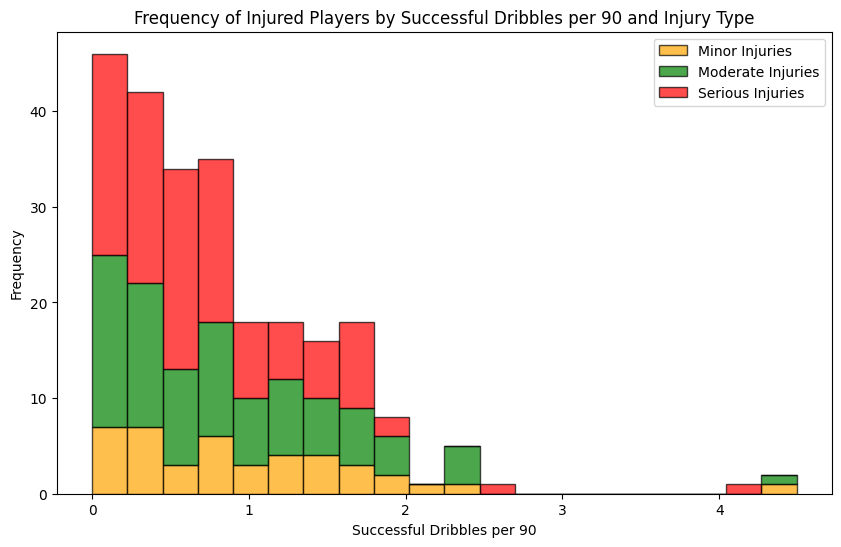

In [118]:
# Set the figure size for the histogram
plt.figure(figsize=(10, 6))

# Plot histogram for each type of injury based on successful dribbles per 90 minutes
plt.hist(
        # Select 'successful dribbles per 90' data for players who have experienced minor injuries per 90 minutes greater than 0
        [injured_players_df['Successful Dribbles per 90'][injured_players_df['Minor Injuries'] > 0],
        # Select 'successful dribbles per 90' data for players who have experienced moderate injuries per 90 minutes greater than 0
        injured_players_df['Successful Dribbles per 90'][injured_players_df['Moderate Injuries'] > 0],
        # Select 'successful dribbles per 90' data for players who have experienced serious injuries per 90 minutes greater than 0
        injured_players_df['Successful Dribbles per 90'][injured_players_df['Serious Injuries'] > 0]],

         bins=20,                           # Define the number of bins for the histogram
         color=['orange', 'green', 'red'],  # Set colors for each injury type
         alpha=0.7,                         # Set transparency level
         stacked=True,edgecolor='black',    # Stack histograms and set edge color
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])  # Add labels for legend

# Set title and labels for the histogram
plt.title('Frequency of Injured Players by Successful Dribbles per 90 and Injury Type')  # Setting the title of the histogram
plt.xlabel('Successful Dribbles per 90') # Setting the label for the x-axis
plt.ylabel('Frequency')                  # Setting the label for the y-axis
plt.legend()     # Display legend
plt.grid(False)  # Turn off grid lines
plt.show()       # Display the plot

**Attempted Dribbles per 90**

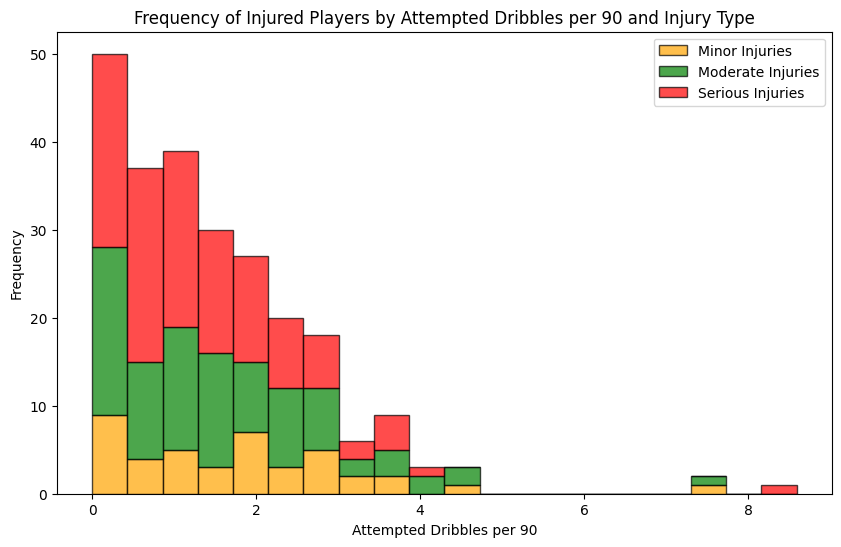

In [119]:
# Set the figure size for the histogram
plt.figure(figsize=(10, 6))

# Plot histogram for each type of injury based on Attempted Dribbles per 90 minutes
plt.hist(
      # Select 'Attempted Dribbles per 90' data for players who have experienced minor injuries per 90 minutes greater than 0
      [injured_players_df['Attempted Dribbles per 90'][injured_players_df['Minor Injuries'] > 0],
      # Select 'Attempted Dribbles per 90' data for players who have experienced moderate injuries per 90 minutes greater than 0
      injured_players_df['Attempted Dribbles per 90'][injured_players_df['Moderate Injuries'] > 0],
      # Select 'Attempted Dribbles per 90' data for players who have experienced serious injuries per 90 minutes greater than 0
      injured_players_df['Attempted Dribbles per 90'][injured_players_df['Serious Injuries'] > 0]],

      bins=20,                          # Define the number of bins for the histogram
         color=['orange', 'green', 'red'], # Set colors for each injury type
         alpha=0.7,                        # Set transparency level
         stacked=True,edgecolor='black',   # Stack histograms and set edge color
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])  # Add labels for legend

# Set title and labels for the histogram
plt.title('Frequency of Injured Players by Attempted Dribbles per 90 and Injury Type') # Setting the title of the histogram
plt.xlabel('Attempted Dribbles per 90')  # Setting the label for the x-axis
plt.ylabel('Frequency')                  # Setting the label for the y-axis
plt.legend()    # Display legend
plt.grid(False) # Turn off grid lines
plt.show()      # Display the plot


**Distance Covered With Ball per 90**

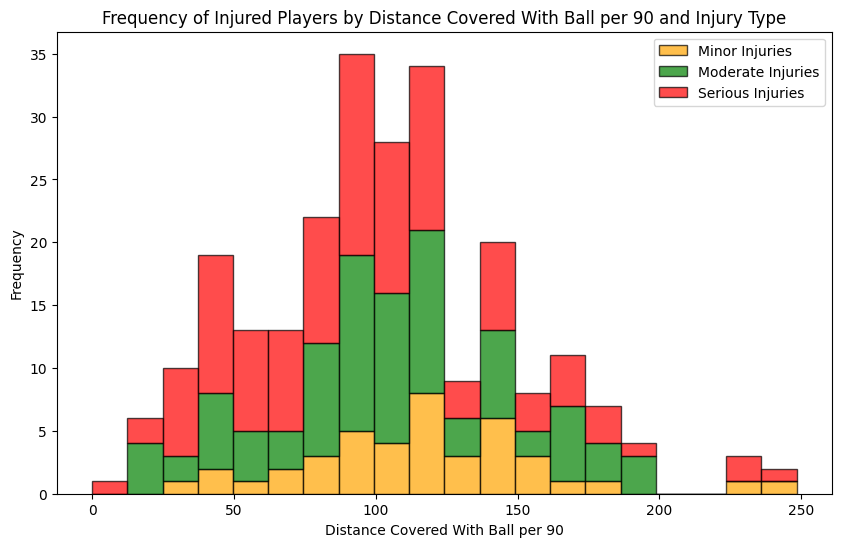

In [120]:
# Set the figure size for the histogram
plt.figure(figsize=(10, 6))

# Plot histogram for each type of injury based on Distance Covered With Ball per 90 minutes
plt.hist(
    # Select 'Distance Covered With Ball per 90' data for players who have experienced minor injuries per 90 minutes greater than 0
    [injured_players_df['Distance Covered With Ball per 90'][injured_players_df['Minor Injuries'] > 0],
    # Select 'Distance Covered With Ball per 90' data for players who have experienced moderate injuries per 90 minutes greater than 0
    injured_players_df['Distance Covered With Ball per 90'][injured_players_df['Moderate Injuries'] > 0],
    # Select 'Distance Covered With Ball per 90' data for players who have experienced serious injuries per 90 minutes greater than 0
    injured_players_df['Distance Covered With Ball per 90'][injured_players_df['Serious Injuries'] > 0]],

         bins=20,                          # Set transparency level
         color=['orange', 'green', 'red'], # Set colors for each injury type
         alpha=0.7,                        # Set transparency level
         stacked=True,edgecolor='black',   # Stack histograms and set edge color
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])  # Add labels for legend

# Set title and labels for the histogram
plt.title('Frequency of Injured Players by Distance Covered With Ball per 90 and Injury Type') # Setting the title of the histogram
plt.xlabel('Distance Covered With Ball per 90')  # Setting the label for the x-axis
plt.ylabel('Frequency')                          # Setting the label for the y-axis
plt.legend()    # Display legend
plt.grid(False) # Turn off grid lines
plt.show()      # Display the plot


**Passes Received per 90**

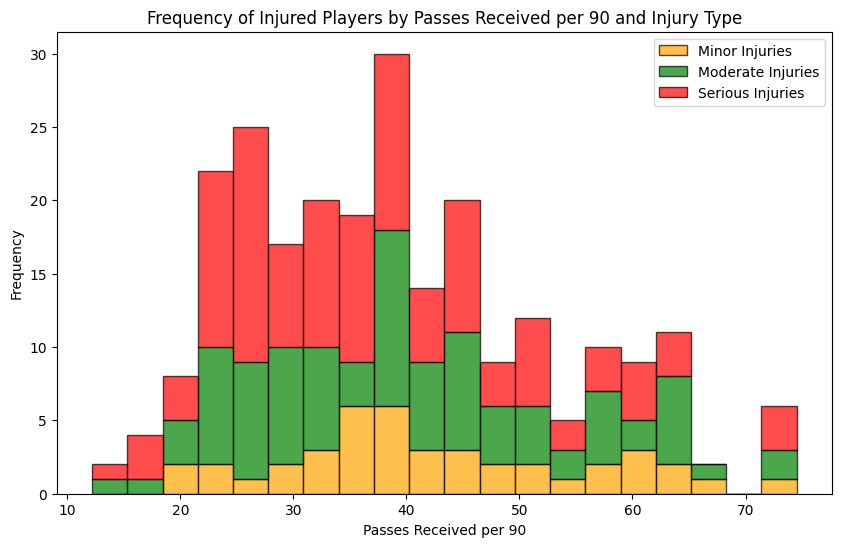

In [121]:
# Set the figure size for the histogram
plt.figure(figsize=(10, 6))

# Plot histogram for each type of injury based on Passes Received per 90 minutes
plt.hist(
    # Select 'Passes Received per 90' data for players who have experienced minor injuries per 90 minutes greater than 0
    [injured_players_df['Passes Received per 90'][injured_players_df['Minor Injuries per 90'] > 0],
    # Select 'Passes Received per 90' data for players who have experienced moderate injuries per 90 minutes greater than 0
    injured_players_df['Passes Received per 90'][injured_players_df['Moderate Injuries per 90'] > 0],
    # Select 'Passes Received per 90' data for players who have experienced serious injuries per 90 minutes greater than 0
    injured_players_df['Passes Received per 90'][injured_players_df['Serious Injuries per 90'] > 0]],

         bins=20,                          # Set transparency level
         color=['orange', 'green', 'red'], # Set colors for each injury type
         alpha=0.7,                        # Set transparency level
         stacked=True,edgecolor='black',   # Stack histograms and set edge color
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])  # Add labels for legend

# Set title and labels for the histogram
plt.title('Frequency of Injured Players by Passes Received per 90 and Injury Type') # Setting the title of the histogram
plt.xlabel('Passes Received per 90')  # Setting the label for the x-axis
plt.ylabel('Frequency')               # Setting the label for the y-axis
plt.legend()    # Display legend
plt.grid(False) # Turn off grid lines
plt.show()      # Display the plot


# **Coorelatioon Heatmap**

In [122]:
# List of selected columns relevant for conducting a performance analysis (CA stands for Coorelation Heatmap)
selected_columns_for_CA = ['Full 90s Played', 'Yellow Cards per 90', 'Red Cards  per 90',
       'Tackles Made per 90', 'Tackles Won per 90',
       'Times Team Pressed Opposition per 90', 'Blocks  per 90',
       'Interceptions per 90', 'Clearances per 90', 'Fouls Commited per 90',
       'Fouls Drawn per 90', 'Loose Balls Recovered per 90', 'Touches per 90',
       'Successful Dribbles per 90', 'Attempted Dribbles per 90',
       'Distance Ran per 90', 'Distance Covered With Ball per 90',
       'Times Dispossessed per 90', 'Passes Received per 90',
       'Total Injuries per 90', 'Minor Injuries per 90',
       'Moderate Injuries per 90', 'Serious Injuries per 90',
       'COVID-19 per 90']

In [123]:
# Counting the occurrences of each club in the filtered DataFrame
df_selected_dataframe = df[selected_columns_for_CA]

In [124]:
# Calculating the correlation matrix for the selected columns
correlation_matrix = df_selected_dataframe.corr()

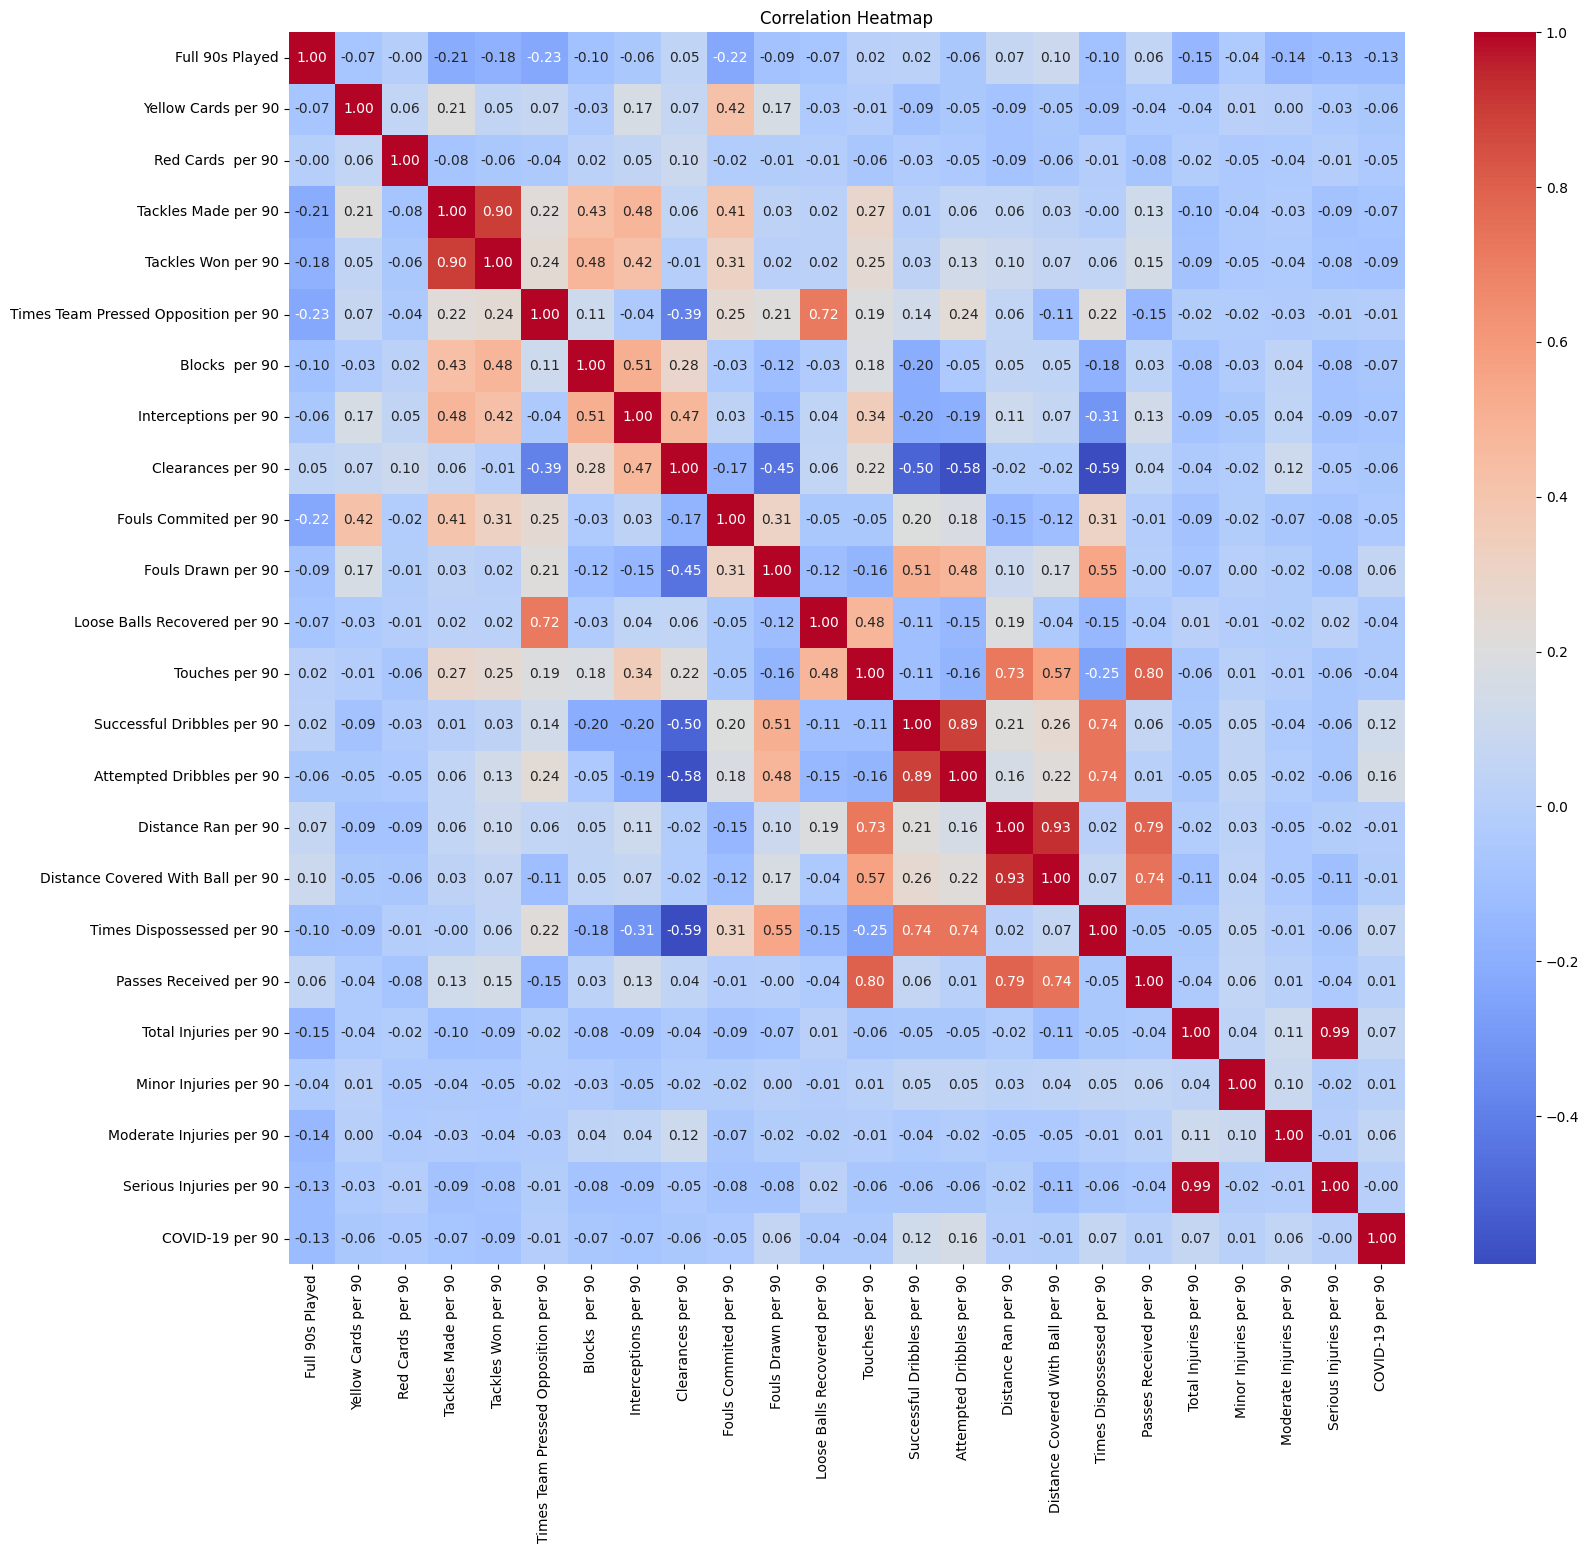

In [125]:
# Creating a figure for the heatmap with specified size
plt.figure(figsize=(18, 16))
# Generating a heatmap to visualize the correlation matrix, with annotations, using the coolwarm color map, and formatting values to two decimal places
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Adding a title to the heatmap
plt.title('Correlation Heatmap')
# Displaying the heatmap
plt.show()

# **Coorelation**

In [126]:
# List of selected columns for analysis
selected_columns = ['Full 90s Played', 'Yellow Cards per 90', 'Red Cards  per 90',
       'Tackles Made per 90', 'Tackles Won per 90',
       'Times Team Pressed Opposition per 90', 'Blocks  per 90',
       'Interceptions per 90', 'Clearances per 90', 'Fouls Commited per 90',
       'Fouls Drawn per 90', 'Loose Balls Recovered per 90', 'Touches per 90',
       'Successful Dribbles per 90', 'Attempted Dribbles per 90',
       'Distance Ran per 90', 'Distance Covered With Ball per 90',
       'Times Dispossessed per 90', 'Passes Received per 90',
       'Total Injuries per 90', 'Minor Injuries per 90',
       'Moderate Injuries per 90', 'Serious Injuries per 90',
       'COVID-19 per 90']

# Selecting the DataFrame with only the selected columns for analysis
df_selected = df[selected_columns]

# Calculate the correlation matrix for total injuries
correlation_total_injuries = df_selected.corr()['Total Injuries per 90'].sort_values(ascending=False)

# Calculate the correlation matrix for major injuries
correlation_major_injuries = df_selected.corr()['Serious Injuries per 90'].sort_values(ascending=False)

# Calculate the correlation matrix for moderate injuries
correlation_moderate_injuries = df_selected.corr()['Moderate Injuries per 90'].sort_values(ascending=False)

# Calculate the correlation matrix for minor injuries
correlation_minor_injuries = df_selected.corr()['Minor Injuries per 90'].sort_values(ascending=False)

# Calculate the correlation matrix for COVID-19 injuries
correlation_covid_injuries = df_selected.corr()['COVID-19 per 90'].sort_values(ascending=False)

In [127]:
# Printing correlation with Total Injuries per 90
print("Correlation with Total Injuries per 90:")
print(correlation_total_injuries)

Correlation with Total Injuries per 90:
Total Injuries per 90                   1.000000
Serious Injuries per 90                 0.989464
Moderate Injuries per 90                0.112888
COVID-19 per 90                         0.067733
Minor Injuries per 90                   0.040430
Loose Balls Recovered per 90            0.014904
Times Team Pressed Opposition per 90   -0.018964
Red Cards  per 90                      -0.019816
Distance Ran per 90                    -0.021380
Yellow Cards per 90                    -0.036922
Clearances per 90                      -0.040241
Passes Received per 90                 -0.040593
Times Dispossessed per 90              -0.052870
Attempted Dribbles per 90              -0.053420
Successful Dribbles per 90             -0.053866
Touches per 90                         -0.061283
Fouls Drawn per 90                     -0.073598
Blocks  per 90                         -0.083197
Interceptions per 90                   -0.086883
Tackles Won per 90           

In [128]:
# Printing correlation with Major Injuries per 90
print("\nCorrelation with Major Injuries per 90:")
print(correlation_major_injuries)


Correlation with Major Injuries per 90:
Serious Injuries per 90                 1.000000
Total Injuries per 90                   0.989464
Loose Balls Recovered per 90            0.020219
COVID-19 per 90                        -0.000073
Moderate Injuries per 90               -0.009845
Red Cards  per 90                      -0.010561
Times Team Pressed Opposition per 90   -0.013904
Distance Ran per 90                    -0.016908
Minor Injuries per 90                  -0.018651
Yellow Cards per 90                    -0.034533
Passes Received per 90                 -0.044955
Clearances per 90                      -0.049506
Touches per 90                         -0.058657
Times Dispossessed per 90              -0.059035
Successful Dribbles per 90             -0.060339
Attempted Dribbles per 90              -0.062966
Fouls Drawn per 90                     -0.076332
Tackles Won per 90                     -0.078224
Fouls Commited per 90                  -0.081281
Blocks  per 90              

In [129]:
# Printing correlation with Moderate Injuries per 90
print("\nCorrelation with Moderate Injuries per 90:")
print(correlation_moderate_injuries)


Correlation with Moderate Injuries per 90:
Moderate Injuries per 90                1.000000
Clearances per 90                       0.116969
Total Injuries per 90                   0.112888
Minor Injuries per 90                   0.096245
COVID-19 per 90                         0.058793
Interceptions per 90                    0.043755
Blocks  per 90                          0.042339
Passes Received per 90                  0.006955
Yellow Cards per 90                     0.000589
Touches per 90                         -0.008787
Times Dispossessed per 90              -0.009178
Serious Injuries per 90                -0.009845
Loose Balls Recovered per 90           -0.016341
Fouls Drawn per 90                     -0.017046
Attempted Dribbles per 90              -0.024352
Tackles Made per 90                    -0.029439
Times Team Pressed Opposition per 90   -0.031008
Successful Dribbles per 90             -0.036011
Tackles Won per 90                     -0.036581
Red Cards  per 90        

In [130]:
# Printing correlation with Minor Injuries per 90
print("\nCorrelation with Minor Injuries per 90:")
print(correlation_minor_injuries)


Correlation with Minor Injuries per 90:
Minor Injuries per 90                   1.000000
Moderate Injuries per 90                0.096245
Passes Received per 90                  0.055281
Successful Dribbles per 90              0.052533
Times Dispossessed per 90               0.050090
Attempted Dribbles per 90               0.049301
Distance Covered With Ball per 90       0.041007
Total Injuries per 90                   0.040430
Distance Ran per 90                     0.029751
Yellow Cards per 90                     0.014442
Touches per 90                          0.008533
COVID-19 per 90                         0.006247
Fouls Drawn per 90                      0.001869
Loose Balls Recovered per 90           -0.013171
Serious Injuries per 90                -0.018651
Fouls Commited per 90                  -0.018778
Times Team Pressed Opposition per 90   -0.020129
Clearances per 90                      -0.024275
Blocks  per 90                         -0.028363
Full 90s Played             

In [131]:
# Printing correlation with COVID-19 Injuries per 90
print("\nCorrelation with COVID-19 Injuries per 90:")
print(correlation_covid_injuries)


Correlation with COVID-19 Injuries per 90:
COVID-19 per 90                         1.000000
Attempted Dribbles per 90               0.155567
Successful Dribbles per 90              0.124811
Times Dispossessed per 90               0.071296
Total Injuries per 90                   0.067733
Fouls Drawn per 90                      0.064930
Moderate Injuries per 90                0.058793
Passes Received per 90                  0.009146
Minor Injuries per 90                   0.006247
Serious Injuries per 90                -0.000073
Times Team Pressed Opposition per 90   -0.011048
Distance Ran per 90                    -0.012808
Distance Covered With Ball per 90      -0.013390
Touches per 90                         -0.041541
Loose Balls Recovered per 90           -0.043525
Red Cards  per 90                      -0.046156
Fouls Commited per 90                  -0.048279
Clearances per 90                      -0.055881
Yellow Cards per 90                    -0.056549
Blocks  per 90           

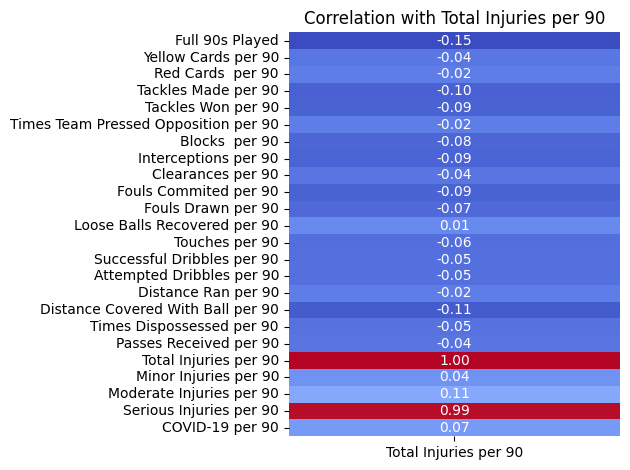

In [132]:
# Plot heatmap for total injuries


# Heatmap to visualize the correlation between each feature and the 'Total Injuries per 90' column
# The correlation values are obtained from the correlation matrix of the selected DataFrame and extracted for the 'Total Injuries per 90' column
# The heatmap is annotated with correlation values, using the coolwarm color map, with values formatted to two decimal places
# The color bar is disabled for better visualization
sns.heatmap(df_selected.corr()['Total Injuries per 90'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with Total Injuries per 90')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

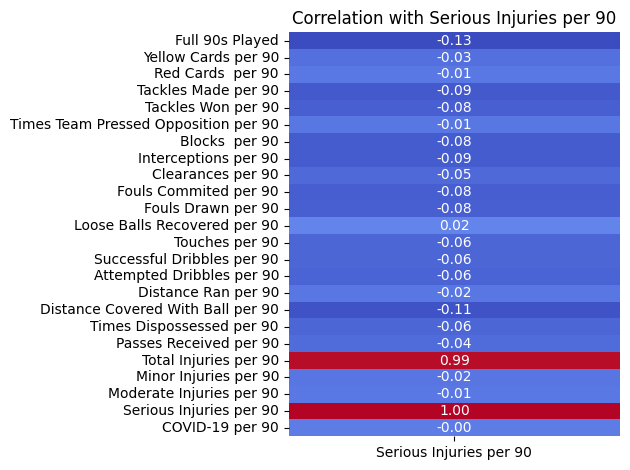

In [133]:
# Plot heatmap for Serious injuries

# Heatmap to visualize the correlation between each feature and the 'Serious Injuries per 90' column
# The correlation values are obtained from the correlation matrix of the selected DataFrame and extracted for the 'Serious Injuries per 90' column
# The heatmap is annotated with correlation values, using the coolwarm color map, with values formatted to two decimal places
# The color bar is disabled for better visualization
sns.heatmap(df_selected.corr()['Serious Injuries per 90'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with Serious Injuries per 90')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


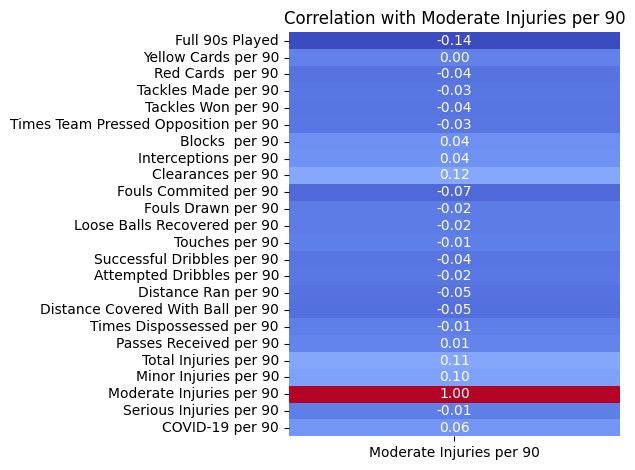

In [134]:
# Plot heatmap for moderate injuries

# Heatmap to visualize the correlation between each feature and the 'moderate Injuries per 90' column
# The correlation values are obtained from the correlation matrix of the selected DataFrame and extracted for the 'moderate Injuries per 90' column
# The heatmap is annotated with correlation values, using the coolwarm color map, with values formatted to two decimal places
# The color bar is disabled for better visualization
sns.heatmap(df_selected.corr()['Moderate Injuries per 90'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with Moderate Injuries per 90')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

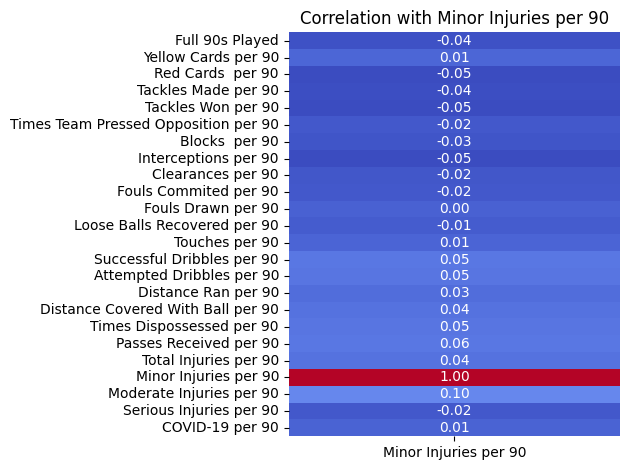

In [135]:
# Plot heatmap for minor injuries

# Heatmap to visualize the correlation between each feature and the 'minor Injuries per 90' column
# The correlation values are obtained from the correlation matrix of the selected DataFrame and extracted for the 'minor Injuries per 90' column
# The heatmap is annotated with correlation values, using the coolwarm color map, with values formatted to two decimal places
# The color bar is disabled for better visualization
sns.heatmap(df_selected.corr()['Minor Injuries per 90'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with Minor Injuries per 90')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

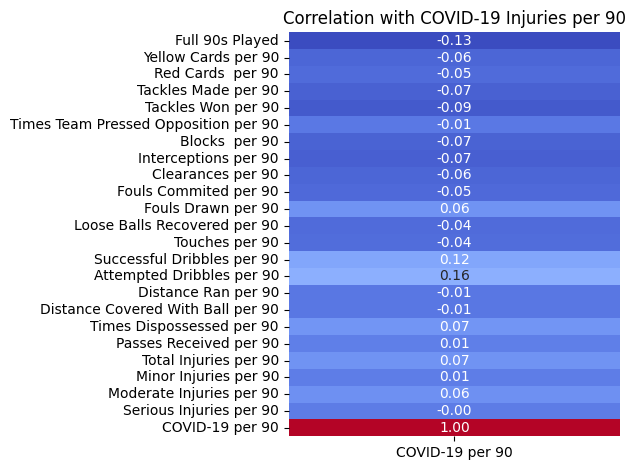

In [136]:
# Plot heatmap for COVID-19 injuries

# Heatmap to visualize the correlation between each feature and the 'COVID-19 Injuries per 90' column
# The correlation values are obtained from the correlation matrix of the selected DataFrame and extracted for the 'COVID-19s Injuries per 90' column
# The heatmap is annotated with correlation values, using the coolwarm color map, with values formatted to two decimal places
# The color bar is disabled for better visualization
sns.heatmap(df_selected.corr()['COVID-19 per 90'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with COVID-19 Injuries per 90')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# **Prepare Data**

In [137]:
# Displaying the column names of the DataFrame
df.columns

Index(['Player Name', 'Position', 'Club Name', 'Age', ' Weekly Salary ',
       'Matches Played', 'Minutes Played', 'Yellow Cards', 'Red Cards ',
       'Shots', 'Shots per 90', 'Tackles Made', 'Tackles Won',
       'Times Team Pressed Opposition', 'Blocks ', 'Interceptions',
       'Clearances', 'Fouls Commited', 'Fouls Drawn', 'Loose Balls Recovered',
       'Aerial Battles Won %', 'Goal Creation per 90',
       'Fully Completed Matches', 'Touches', 'Successful Dribbles',
       'Attempted Dribbles', 'Distance Ran', 'Distance Covered With Ball',
       'Times Dispossessed', 'Passes Received', 'Total Injuries',
       'Minor Injuries', 'Moderate Injuries', 'Serious Injuries', 'COVID-19',
       'Full 90s Played', 'Yellow Cards per 90', 'Red Cards  per 90',
       'Tackles Made per 90', 'Tackles Won per 90',
       'Times Team Pressed Opposition per 90', 'Blocks  per 90',
       'Interceptions per 90', 'Clearances per 90', 'Fouls Commited per 90',
       'Fouls Drawn per 90', 'Loose Ba

In [138]:
# Creating a list of columns to be dropped from the DataFrame
# These columns include player-specific details, club-related information, individual match statistics, and injury-related metrics
drop_columns = df[['Player Name','Club Name',' Weekly Salary ', 'Matches Played', 'Minutes Played', 'Yellow Cards', 'Red Cards ',
                  'Shots','Tackles Made', 'Tackles Won','Times Team Pressed Opposition', 'Blocks ', 'Interceptions',
       'Clearances', 'Fouls Commited', 'Fouls Drawn', 'Loose Balls Recovered','Fully Completed Matches', 'Touches', 'Successful Dribbles',
       'Attempted Dribbles', 'Distance Ran', 'Distance Covered With Ball','Times Dispossessed', 'Passes Received', 'Total Injuries',
       'Minor Injuries', 'Moderate Injuries', 'Serious Injuries', 'COVID-19','Yellow Cards per 90', 'Red Cards  per 90','COVID-19 per 90','Total Injuries per 90']]

In [139]:
# Dropping the selected columns from the DataFrame
df = df.drop(drop_columns, axis=1)

# **Create Injury Type Column**

In [140]:
# Initialize a new column named 'Injury_Type' and set all values to 0
df['Injury_Type'] = 0  # Initialize all values to 0

# Assign values based on conditions for each type of injury

# If 'Serious Injuries per 90' is greater than 0, assign 1 for Serious Injuries
df.loc[df['Serious Injuries per 90'] > 0, 'Injury_Type'] = 1
# If 'Moderate Injuries per 90' is greater than 0, assign 2 for Moderate Injuries
df.loc[df['Moderate Injuries per 90'] > 0, 'Injury_Type'] = 2
# If 'Minor Injuries per 90' is greater than 0, assign 3 for Minor Injuries
df.loc[df['Minor Injuries per 90'] > 0, 'Injury_Type'] = 3

# Drop the individual injury columns ('Serious Injuries per 90', 'Moderate Injuries per 90', 'Minor Injuries per 90')
df.drop(['Serious Injuries per 90', 'Moderate Injuries per 90', 'Minor Injuries per 90'], axis=1, inplace=True)


# **Encode POSITION Column**

In [141]:
# Create a LabelEncoder object to convert categorical positions into numerical labels
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the 'Position' column and transform it to encode positions with numerical labels
df['Position_Encoded'] = label_encoder.fit_transform(df['Position'])

# Display the mapping of original position names to their corresponding encoded numerical values
print("Mapping of original positions to encoded values:")
for position, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{position}: {encoded_value}")


Mapping of original positions to encoded values:
DF: 0
DFFW: 1
DFMF: 2
FW: 3
FWDF: 4
FWMF: 5
GK: 6
MF: 7
MFDF: 8
MFFW: 9


In [142]:
df.head()

,Position,Age,Shots per 90,Aerial Battles Won %,Goal Creation per 90,Full 90s Played,Tackles Made per 90,Tackles Won per 90,Times Team Pressed Opposition per 90,Blocks per 90,...,Loose Balls Recovered per 90,Touches per 90,Successful Dribbles per 90,Attempted Dribbles per 90,Distance Ran per 90,Distance Covered With Ball per 90,Times Dispossessed per 90,Passes Received per 90,Injury_Type,Position_Encoded
0,DF,21,0.41,22.7,0.16,32.011111,2.155502,1.155849,13.557792,2.686567,...,5.529330,57.948629,1.030892,2.436654,199.368275,121.614023,0.937175,32.395002,0,0
1,DF,20,0.64,51.3,0.30,20.311111,3.741794,2.117068,19.792123,1.673961,...,6.646608,63.068928,1.969365,3.594092,182.363239,113.238512,1.575492,35.891685,2,0
2,DF,23,0.32,62.4,0.27,22.166667,1.804511,0.992481,9.293233,1.624060,...,8.390977,49.984962,0.496241,0.766917,152.706767,92.345865,0.496241,24.090226,1,0
3,DF,26,0.49,83.7,0.00,10.255556,1.462622,0.487541,6.825569,1.170098,...,7.605634,91.267606,0.000000,0.195016,347.128927,217.053088,0.097508,70.595883,0,0
4,DF,22,1.61,45.0,0.54,31.700000,1.388013,0.757098,9.085174,1.230284,...,10.063091,94.921136,0.820189,1.388013,190.662461,104.574132,0.820189,59.274448,2,0


In [143]:
df['Position_Encoded']

0      0
1      0
2      0
3      0
4      0
      ..
465    9
466    9
467    9
468    9
469    9
Name: Position_Encoded, Length: 430, dtype: int64

In [144]:
df.columns

Index(['Position', 'Age', 'Shots per 90', 'Aerial Battles Won %',
       'Goal Creation per 90', 'Full 90s Played', 'Tackles Made per 90',
       'Tackles Won per 90', 'Times Team Pressed Opposition per 90',
       'Blocks  per 90', 'Interceptions per 90', 'Clearances per 90',
       'Fouls Commited per 90', 'Fouls Drawn per 90',
       'Loose Balls Recovered per 90', 'Touches per 90',
       'Successful Dribbles per 90', 'Attempted Dribbles per 90',
       'Distance Ran per 90', 'Distance Covered With Ball per 90',
       'Times Dispossessed per 90', 'Passes Received per 90', 'Injury_Type',
       'Position_Encoded'],
      dtype='object')

# **Model Training Step**

In [145]:
# Extract features (X) by dropping the 'Injury_Type' and 'Position' columns from the DataFrame
X = df.drop(columns=['Injury_Type','Position'])  # Features

# Extract the target variable (y) which is the 'Injury_Type' column
y = df['Injury_Type']  # Target variable

# **Random Forest Model Without Tuning**

In [146]:
# Split the dataset into training and testing sets, with 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier with a random state of 42
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the target variable for the test set using the trained classifier
y_pred = rf_classifier.predict(X_test)

In [147]:
# Calculate the accuracy of the classifier by comparing the predicted values with the actual values in the test set
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the classifier
print("Accuracy:", accuracy)

Accuracy: 0.5581395348837209


# **Confusion Matrix**

In [148]:
# Assuming y_test are the actual labels and y_pred are the predictions from the RandomForestClassifier

# Calculate the confusion matrix to evaluate the performance of the classifier
conf_matrix = confusion_matrix(y_test, y_pred)

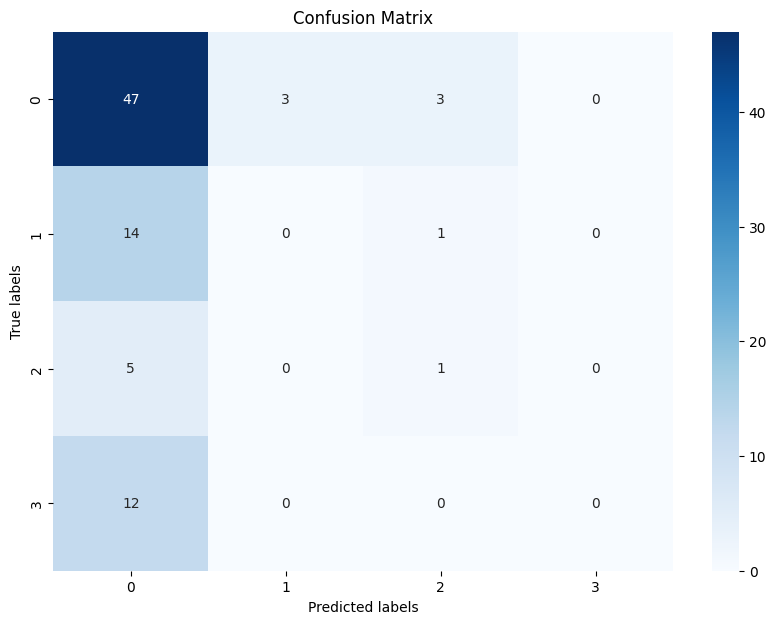

In [149]:
# Set the figure size for the heatmap visualization
plt.figure(figsize=(10, 7))

# Plot the confusion matrix as a heatmap with annotations, using a blue color map
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')  # labels for the x-axis
plt.ylabel('True labels')       # labels for the y-axis
plt.title('Confusion Matrix')   # Add a title to the plot
plt.show()                      # Display the heatmap

In [150]:
# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5581395348837209


In [151]:
# Generate a classification report to provide a detailed summary of the classifier's performance
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.89      0.72        53
           1       0.00      0.00      0.00        15
           2       0.20      0.17      0.18         6
           3       0.00      0.00      0.00        12

    accuracy                           0.56        86
   macro avg       0.20      0.26      0.22        86
weighted avg       0.39      0.56      0.45        86



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **RandomForest Model With Tuning**

**Step-1**

In [152]:
# Step 1: Balance the Dataset using Synthetic Minority Over-sampling Technique (SMOTE)
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

**Step-2**

In [153]:
# Step 2: Split the Balanced Dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

**Step-3**

In [154]:
# Step 3: Apply Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [155]:
# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [156]:
# Perform grid search using cross-validation (cv=5) and evaluate models based on accuracy
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [157]:
# Print the best parameters found during the grid search
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


**Step-4**

In [158]:
# Step 4: Evaluate the Model
# Get the best classifier found during grid search
best_rf_classifier = grid_search.best_estimator_

# Predict the target variable for the test set using the best classifier
y_pred = best_rf_classifier.predict(X_test)

In [159]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8052631578947368


# **Prediction for NEW INPUT**

In [87]:
# (['Age', 'Shots per 90', 'Aerial Battles Won %', 'Goal Creation per 90',
#        'Full 90s Played', 'Tackles Made per 90', 'Tackles Won per 90',
#        'Times Team Pressed Opposition per 90', 'Blocks  per 90',
#        'Interceptions per 90', 'Clearances per 90', 'Fouls Commited per 90',
#        'Fouls Drawn per 90', 'Loose Balls Recovered per 90', 'Touches per 90',
#        'Successful Dribbles per 90', 'Attempted Dribbles per 90',
#        'Distance Ran per 90', 'Distance Covered With Ball per 90',
#        'Times Dispossessed per 90', 'Passes Received per 90',
#        'Position_Encoded'],
#       dtype='object')

In [175]:
# Define new input data as a list containing features for prediction
new_input_data_1 = [['26','5.64','51.3',	'1.30',	'20.311111',	'3.741794',
                     '	1.117068',	'1.792123',	'1.673961',	'1.870897	',
                     '2.575492',	'0.984683',	'1.132385',	'6.646608',	'63.068928',
                     '1.969365',	'3.594092',	'1.363239',	'1.238512',	'1.575492',
                     '1.891685'	, '0']]

In [176]:
new_predictions = best_rf_classifier.predict(new_input_data_1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [177]:
# Assign a human-readable label based on the predicted class label

# Print the interpretation of the predicted class label
if new_predictions == 0:
    print("No injury")
elif new_predictions == 1:
    print("Serious injury")
elif new_predictions == 2:
    print("Moderate injury")
elif new_predictions == 3:
    print("Minor injury")
else:
    print("Invalid class label")

No injury
